In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam
# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

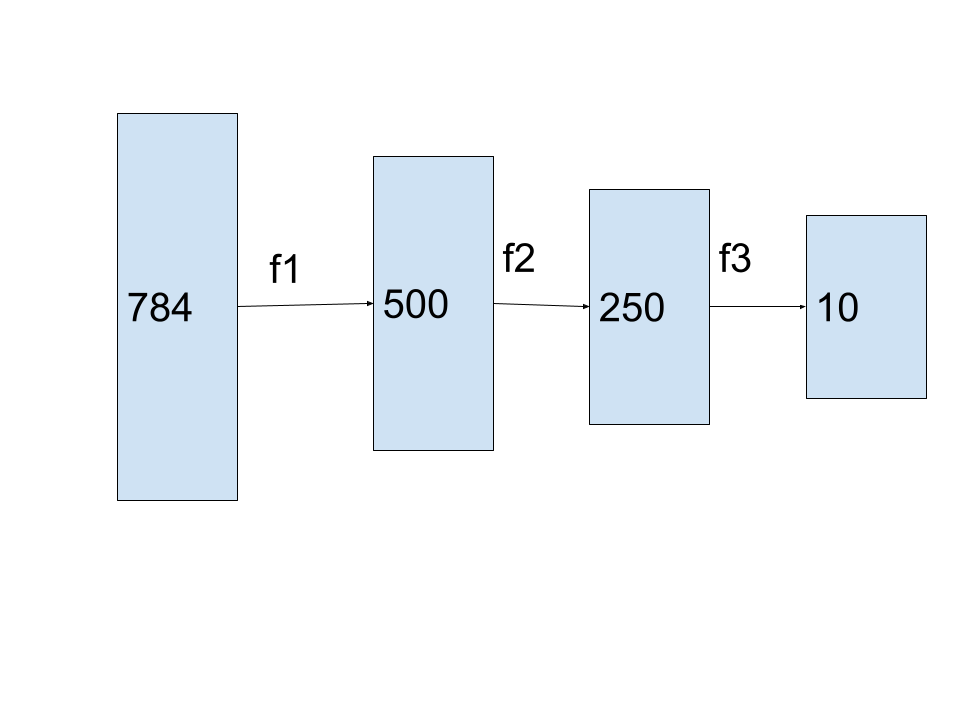

In [20]:
#定義兩層隱藏層以及一層隱藏成的運算結果

f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(250, activation='sigmoid')
f_3 = Dense(10, activation='softmax')

from IPython.display import Image
Image(filename="image1.png")

In [5]:
#定義第一個輸入變數
x = Input(shape=(784,))

In [6]:
a= f_1(x)
b= f_2(a)
y= f_3(b)

In [7]:
#將模型輸入和輸出包裝起來
model = Model(x,y)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, 
          batch_size=256, 
          epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0363 - acc: 0.73981s - loss: 0.03
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0224 - acc: 0.84531
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0205 - acc: 0.8577
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0191 - acc: 0.8683
Epoch 5/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0185 - acc: 0.8740


In [10]:
model.save_weights('MNIST_Model.h5')
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 2s 32us/sample - loss: 0.0173 - acc: 0.8817
Loss: 0.017286011017858982
準確率: 88.1683349609375


In [11]:
from tensorflow.keras.layers import concatenate, add
c = Dense(250, activation='relu')
z = c(a)

# new f_3
f_3 = Dense(10, activation='softmax')

u = concatenate([b, z])
y = f_3(u)

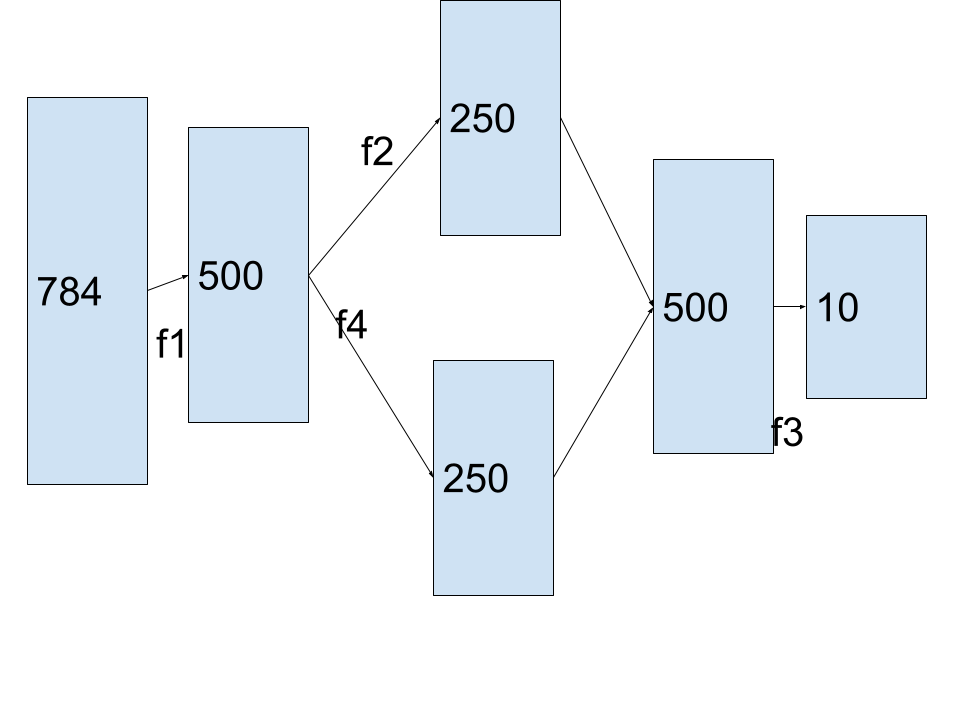

In [21]:
from IPython.display import Image
Image(filename="image2.png")

In [13]:
model = Model(x, y)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 250)          125250      dense[0][0]                      
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 250)          125250      dense[0][0]                      
____________________________________________________________________________________________

In [14]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, 
          batch_size=256, 
          epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0214 - acc: 0.8511
Epoch 2/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0177 - acc: 0.8791
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0170 - acc: 0.8831
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0164 - acc: 0.8882
Epoch 5/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0158 - acc: 0.8915


In [16]:
model.save_weights('MNIST_Model.h5')
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 2s 36us/sample - loss: 0.0153 - acc: 0.8953
Loss: 0.015337304677814245
準確率: 89.53166604042053


In [ ]:
#較前者準確率高了1%  可能是訓練次數不多的關係，較果不顯著